In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from scipy import stats
import warnings
from IPython.display import Image
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# https://www.kaggle.com/c/house-prices-advanced-regression-techniques のtrain.csv
df = pd.read_csv("data/train.csv")

In [3]:
print(df.shape)
df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# 問題1 
X = df.loc[: ,["GrLivArea", "YearBuilt"]]
y = df.loc[: ,["SalePrice"]]
print(X.head())
print(y.head())

   GrLivArea  YearBuilt
0       1710       2003
1       1262       1976
2       1786       2001
3       1717       1915
4       2198       2000
   SalePrice
0     208500
1     181500
2     223500
3     140000
4     250000


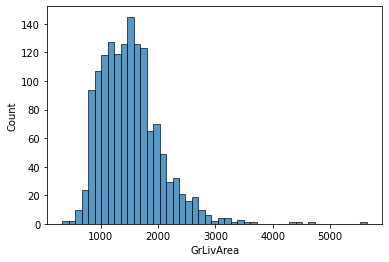

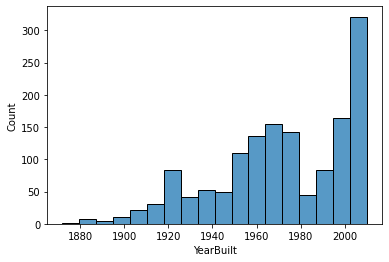

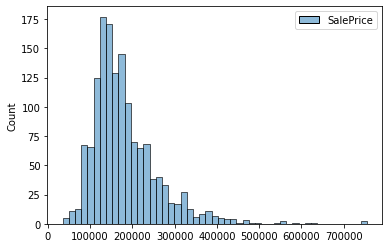

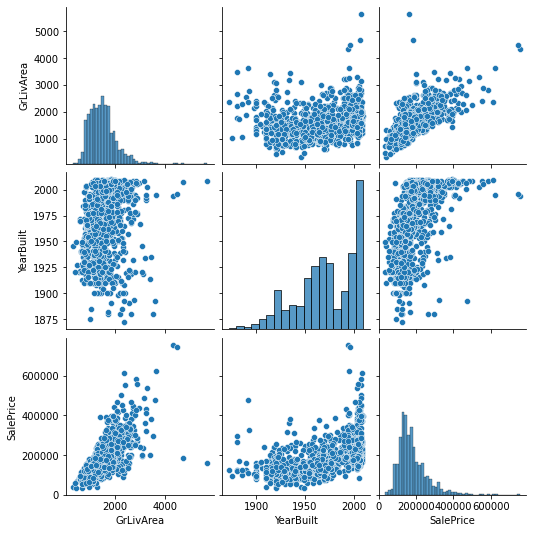

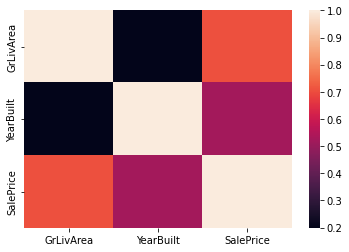

In [5]:
# 問題2
# 分析
sns.histplot(X["GrLivArea"])
plt.show()
sns.histplot(X["YearBuilt"])
plt.show()
sns.histplot(y)
plt.show()
sns.pairplot(df.loc[: ,["GrLivArea", "YearBuilt", "SalePrice"]])
plt.show()
sns.heatmap(df.loc[: ,["GrLivArea", "YearBuilt", "SalePrice"]].corr())
plt.show()

### 考察
- salePriceとGrLivAreaは相関が高そう。敷地が広い方が価格が高い。
- YearBuiltはGrLivAreaほど相関はないが、新築物件の方が価格が高そう。

In [6]:
# 前処理 StandardScalerで標準化
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [7]:
# 学習
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [8]:
# 予測
target_pred = lr.predict(X_test)

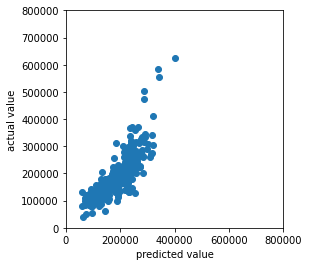

平均二乗誤差(MSE)による視標値: 1983765930.5988855


In [9]:
# 結果を可視化
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(target_pred, y_test)
ax.set_xlabel('predicted value')
ax.set_ylabel('actual value')
plt.xlim(0,800000)
plt.ylim(0,800000)
ax.set_aspect('equal', adjustable='box')
plt.show()
from sklearn.metrics import mean_squared_error
print("平均二乗誤差(MSE)による視標値: {}".format(mean_squared_error(y_test,target_pred)))

### 考察
散文図より、予測と実際の値が大体同じであることがわかる。ただし、予測の方が安い値段をつける傾向がありそう。もっとも高額の600000が400000付近と予測している。

In [10]:
# 問題3 手法の比較
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

## 分析用関数
def evaluate_model(X_train, X_test, y_train, y_test, model, model_name, graph=True):
    model.fit(X_train, y_train)
    target_pred = model.predict(X_test)
    if graph:
        fig, ax = plt.subplots()
        ax.set_title(model_name)
        ax.scatter(target_pred, y_test)
        ax.set_xlabel('predicted value')
        ax.set_ylabel('actual value')
        plt.xlim(0,800000)
        plt.ylim(0,800000)
        ax.set_aspect('equal', adjustable='box')
        plt.show()
    from sklearn.metrics import mean_squared_error
    mse = mean_squared_error(y_test,target_pred)
    print("平均二乗誤差(MSE)による視標値: {}".format(mse))
    return pd.DataFrame([{"MSE": mse}], index=[model_name])

def compare_models(X_train, X_test, y_train, y_test, graph=True):
    lr_result = evaluate_model(X_train, X_test, y_train, y_test, LinearRegression(), "Linear Regression", graph)
    svm_result = evaluate_model(X_train, X_test, y_train, y_test, SVC(), "SVM", graph)
    dt_result = evaluate_model(X_train, X_test, y_train, y_test, DecisionTreeClassifier(), "Decision Tree", graph)
    rf_result = evaluate_model(X_train, X_test, y_train, y_test, RandomForestClassifier(), "random forest", graph)
    return pd.concat([lr_result, svm_result, dt_result, rf_result])

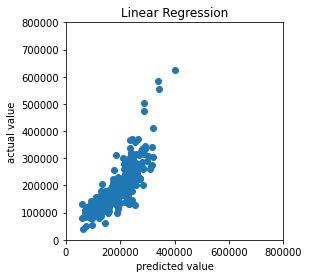

平均二乗誤差(MSE)による視標値: 1983765930.5988855


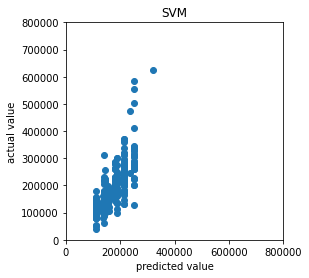

平均二乗誤差(MSE)による視標値: 3063894845.580822


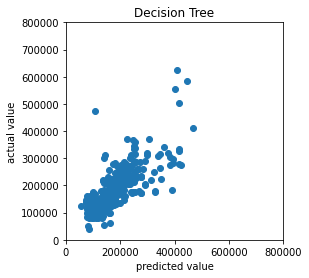

平均二乗誤差(MSE)による視標値: 2796957707.180822


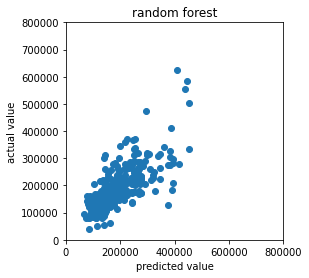

平均二乗誤差(MSE)による視標値: 2871671568.8630137


,MSE
Linear Regression,1.983766e+09
SVM,3.063895e+09
Decision Tree,2.796958e+09
random forest,2.871672e+09


In [11]:
compare_result_GrLivArea_YearBuilt = compare_models(X_train, X_test, y_train, y_test)
compare_result_GrLivArea_YearBuilt

### 比較結果考察
- Linear Regressionが最も良かった。
- 散文図より、SVMはいくつかの固定の予測値に収束させるような形で分類してそうに見える。
- 散文図より、価格の大きい値に対しては、決定木、ランダムフォレストの方が一致度の高い予測をしているように見える

In [12]:
#問題4
# データ再取得
X = df.drop(["Id", "SalePrice"], axis=1)
y = df.loc[: ,["SalePrice"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [13]:
#問題4 前処理
# # 前処理1 欠損確認, 補完
print("欠損値を含むデータ数: {} (全体: {})".format(X.isnull().sum().sum(), len(X)))
print("欠損値を含む項目数: {} (全体: {})".format((X.isnull().sum() > 0).sum(), len(X.columns)))
pd.set_option('display.max_rows', 100)
pd.DataFrame({'total':  X.isnull().sum(), 'missing_ratio': X.isnull().sum() / len(X)}).sort_values('total', ascending=False)

欠損値を含むデータ数: 6965 (全体: 1460)
欠損値を含む項目数: 19 (全体: 79)


,total,missing_ratio
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageQual,81,0.055479
GarageCond,81,0.055479


In [14]:
# 欠損を含むデータの例
X.loc[:, X.isnull().sum() > 0].head()

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
1,80.0,NaN,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,60.0,NaN,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
4,84.0,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN


### 欠損値の対する処理の方針
79項目中19が欠損をもつ項目で、Electricalなどは欠損の少ないものは補完するかは別途検討が必要だが、今回はまとめて除外する

In [15]:
# 欠損のあるデータを削除
X = X.loc[:, X.isnull().sum() == 0]

In [16]:
# 削除されたことを確認
X.shape

(1460, 60)

In [17]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1446,20,RL,NaN,26142,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
1123,20,RL,50.0,9405,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
186,80,RL,NaN,9947,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,0,NaN,GdPrv,NaN,0,6,2009,WD,Normal
1020,20,RL,60.0,7024,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal
67,20,RL,72.0,10665,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal


In [18]:
# データタイプを調べる
print("数値データの項目数: {}, カテゴリデータの項目数] {}".format(len(X.select_dtypes(exclude=["object"]).columns), len(X.select_dtypes(exclude=["int64"]).columns)))

数値データの項目数: 33, カテゴリデータの項目数] 27


### 考察
数値データのみの項目数も多いので数値のみで考えてみる

In [19]:
X_num = X.select_dtypes(exclude=["object"])
X_train, X_test, y_train, y_test = train_test_split(X_num, y, random_state=123)

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

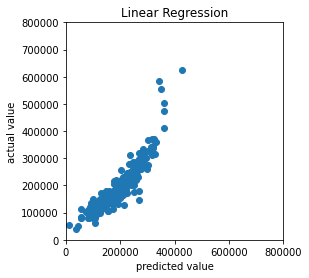

平均二乗誤差(MSE)による視標値: 1046669182.90826


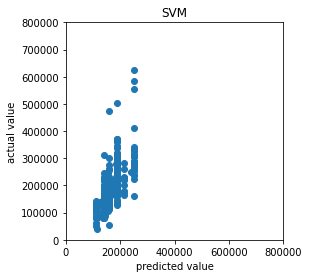

平均二乗誤差(MSE)による視標値: 3841533009.9643836


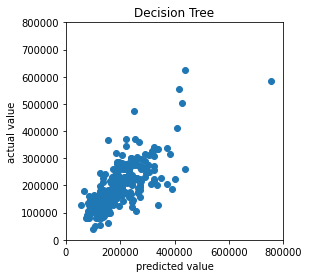

平均二乗誤差(MSE)による視標値: 2807121154.9945207


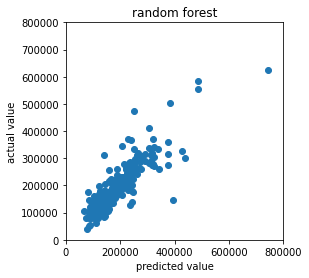

平均二乗誤差(MSE)による視標値: 1517815758.5479453


,MSE
Linear Regression,1.046669e+09
SVM,3.841533e+09
Decision Tree,2.807121e+09
random forest,1.517816e+09


In [21]:
compare_result_only_num = compare_models(X_train, X_test, y_train, y_test)
compare_result_only_num

In [22]:
display("GrLivArea YearBuiltのみの結果")
compare_result_GrLivArea_YearBuilt

'GrLivArea YearBuiltのみの結果'

,MSE
Linear Regression,1.983766e+09
SVM,3.063895e+09
Decision Tree,2.796958e+09
random forest,2.871672e+09


### 数値のみのデータとGrLivArea YearBuiltのみの結果比較
- GrLivArea YearBuiltのみで最も良かったLinear Regressionがさらに精度が上がった。
- random forestのみ下がった。

In [23]:
# 数値の相関は見ておく。
num_data_corrs = df.drop(["Id"], axis=1).select_dtypes(exclude=["object"]).corr()
# sns.heatmap(num_data_corrs)
num_data_corrs["SalePrice"].sort_values(ascending=False).head(20)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
Name: SalePrice, dtype: float64

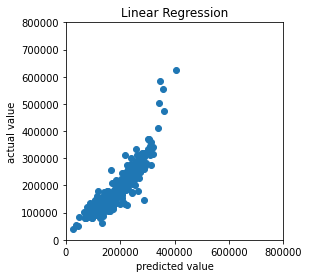

平均二乗誤差(MSE)による視標値: 1283853988.3798432


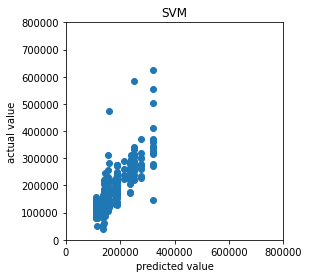

平均二乗誤差(MSE)による視標値: 2291449283.9369864


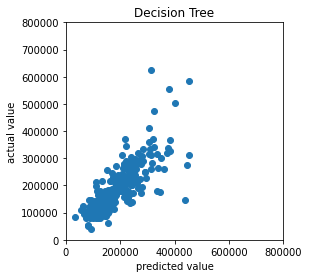

平均二乗誤差(MSE)による視標値: 2256648399.260274


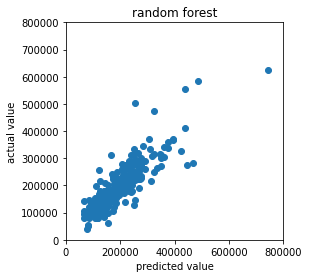

平均二乗誤差(MSE)による視標値: 1586656913.4520547


,MSE
Linear Regression,1.283854e+09
SVM,2.291449e+09
Decision Tree,2.256648e+09
random forest,1.586657e+09


In [24]:
# 相関が0.5以上のものに絞って検証してみる
X_num_high_corr = X.select_dtypes(exclude=["object"]).loc[:, num_data_corrs["SalePrice"] > 0.5]
X_train, X_test, y_train, y_test = train_test_split(X_num_high_corr, y, random_state=123)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)
compare_result_only_num_and_over_05_corr = compare_models(X_train, X_test, y_train, y_test)
compare_result_only_num_and_over_05_corr

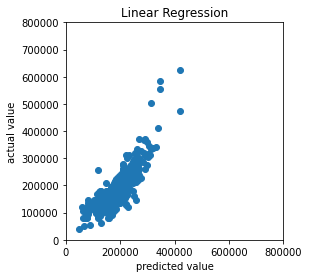

平均二乗誤差(MSE)による視標値: 1640468530.4235556


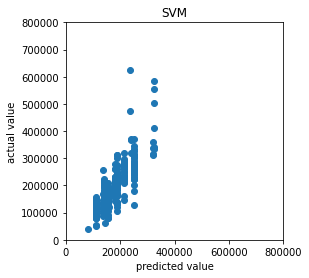

平均二乗誤差(MSE)による視標値: 2499172911.3342466


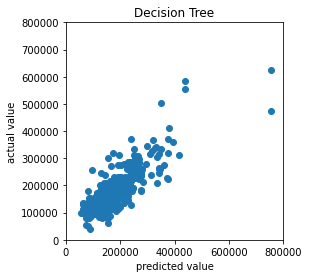

平均二乗誤差(MSE)による視標値: 2279603201.520548


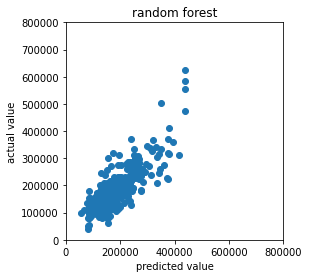

平均二乗誤差(MSE)による視標値: 2028089073.5534246


,MSE
Linear Regression,1.640469e+09
SVM,2.499173e+09
Decision Tree,2.279603e+09
random forest,2.028089e+09


In [25]:
# 相関が0.7以上のものに絞って検証してみる
X_num_high_corr = X.select_dtypes(exclude=["object"]).loc[:, num_data_corrs["SalePrice"] > 0.7]
X_train, X_test, y_train, y_test = train_test_split(X_num_high_corr, y, random_state=123)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)
compare_result_only_num_and_over_07_corr = compare_models(X_train, X_test, y_train, y_test)
compare_result_only_num_and_over_07_corr

In [26]:
# 比較
pd.DataFrame({'数値のみ': compare_result_only_num["MSE"],
                    '数値のみ相関係数0.5以上': compare_result_only_num_and_over_05_corr["MSE"],
                    '数値のみ相関係数0.7以上': compare_result_only_num_and_over_07_corr["MSE"]})

,数値のみ,数値のみ相関係数0.5以上,数値のみ相関係数0.7以上
Linear Regression,1.046669e+09,1.283854e+09,1.640469e+09
SVM,3.841533e+09,2.291449e+09,2.499173e+09
Decision Tree,2.807121e+09,2.256648e+09,2.279603e+09
random forest,1.517816e+09,1.586657e+09,2.028089e+09


### 考察
相関のみに絞った方が全体的に良くなるかと思ったが、違った結果になった。
相関が高いもののみに絞るとLinear Regressionは悪くなった。Decision Treeは逆に良くなった。

(1460, 182)


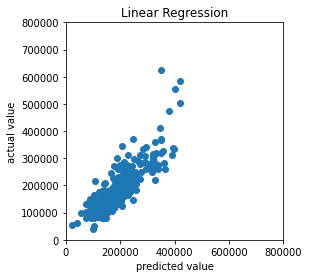

平均二乗誤差(MSE)による視標値: 1682524494.7736723


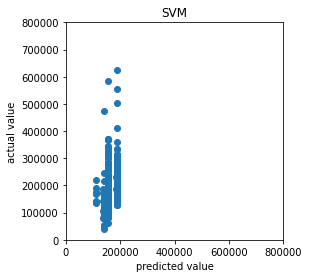

平均二乗誤差(MSE)による視標値: 5670565283.936986


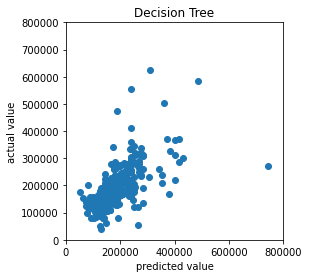

平均二乗誤差(MSE)による視標値: 3953828810.139726


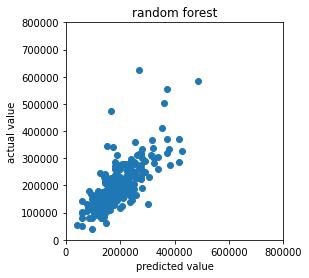

平均二乗誤差(MSE)による視標値: 2553722846.2657533


,MSE
Linear Regression,1.682524e+09
SVM,5.670565e+09
Decision Tree,3.953829e+09
random forest,2.553723e+09


In [27]:
# 今度はカテゴリデータのみを扱った検証する
# データ作成
X_cate = X.select_dtypes(exclude=["int64"])
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ohe = ColumnTransformer([("OneHotEncoder", OneHotEncoder(), X_cate.columns)], remainder = 'passthrough')
X_cate_ohe = X_cate.copy()
ohe.fit(X_cate_ohe)
X_cate_ohe = ohe.transform(X_cate_ohe)
print(np.shape(X_cate_ohe))
X_train, X_test, y_train, y_test = train_test_split(X_cate_ohe, y, random_state=123)
compare_result_only_categorical = compare_models(X_train, X_test, y_train, y_test)
compare_result_only_categorical

### 考察

- Linear Regressionが一番良い
- 数値に比べると全体的には悪い

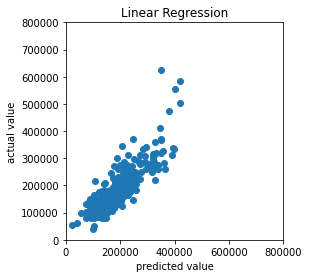

平均二乗誤差(MSE)による視標値: 1686718221.3691473


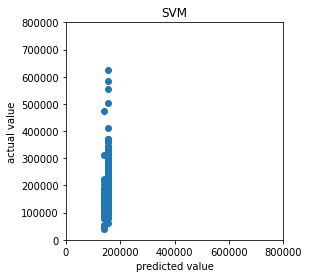

平均二乗誤差(MSE)による視標値: 6747217530.512329


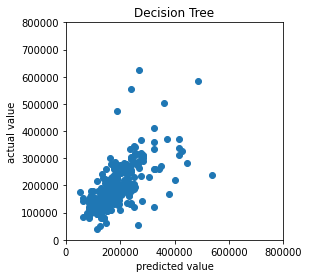

平均二乗誤差(MSE)による視標値: 3593609430.183562


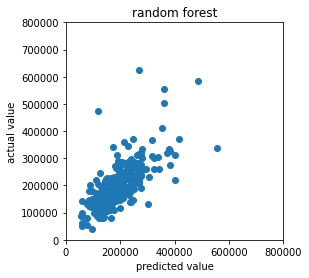

平均二乗誤差(MSE)による視標値: 2876068578.6246576


,MSE
Linear Regression,1.686718e+09
SVM,6.747218e+09
Decision Tree,3.593609e+09
random forest,2.876069e+09


In [28]:
# 最後に欠損値を含まない全てのデータを対象にして分析する

# OHE
ohe = ColumnTransformer([("OneHotEncoder", OneHotEncoder(),  X.select_dtypes(exclude=["int64"]).columns)], remainder = 'passthrough')
X_cate_ohe = X_cate.copy()
ohe.fit(X_cate_ohe)
X_cate_ohe = ohe.transform(X_cate_ohe)
# データ分割
X_train, X_test, y_train, y_test = train_test_split(X_cate_ohe, y, random_state=123)

# 標準化
# エラー起きないようにwith_mean=False
sc = StandardScaler(with_mean=False)
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

compare_result_ohe_starndardScaled = compare_models(X_train, X_test, y_train, y_test)
compare_result_ohe_starndardScaled

### 考察
- SVMは特に悪く、大体の予想値が200000弱の値になっている。

In [29]:
display("今回試した方法を比較")
pd.DataFrame(
                    {
                        '欠損値以外全て': compare_result_ohe_starndardScaled["MSE"],
                        '数値のみ': compare_result_only_num["MSE"],
                        '数値のみ相関係数0.5以上': compare_result_only_num_and_over_05_corr["MSE"],
                        '数値のみ相関係数0.7以上': compare_result_only_num_and_over_07_corr["MSE"],
                        'カテゴリデータのみ': compare_result_only_categorical["MSE"],                        
                    }
)

'今回試した方法を比較'

,欠損値以外全て,数値のみ,数値のみ相関係数0.5以上,数値のみ相関係数0.7以上,カテゴリデータのみ
Linear Regression,1.686718e+09,1.046669e+09,1.283854e+09,1.640469e+09,1.682524e+09
SVM,6.747218e+09,3.841533e+09,2.291449e+09,2.499173e+09,5.670565e+09
Decision Tree,3.593609e+09,2.807121e+09,2.256648e+09,2.279603e+09,3.953829e+09
random forest,2.876069e+09,1.517816e+09,1.586657e+09,2.028089e+09,2.553723e+09


### 考察

- 数値のみの時のLinear Regressionが最も良かった。
- random forestが2番目によい。
- SVMは結果にぶれが大きかった。
- 相関が高いものの方が相関のないものに左右されずにより

### TODO

- クロスバリデーションも実行
- ハイパーパラメータのチューニング
- 相関だけを見ても精度が上がらない。どう扱う項目を選定していくか？
- OHEは標準化と異なり、トレーニング、テストデータ分割前に行ったが正しいか？